<font color = 'green'>
<h1>Breast Cancer Wisconsin (Diagnostic)<h1>

# Introduction
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
<br>
<br>
<font color = 'blue'>
<b>Content: </b>

1. [Load Libraries](#2)
1. [Load Dataset](#3)    
1. [Descriptive Analysis](#4)
1. [EDA](#5)
1. [Missing Values](#6)
1. [Data Visualization](#7)
    * [Count Plot](#8)
    * [Pie Chart](#9)
    * [Distribution Plot](#10)
   
1. [Outlier Detection](#11)
1. [Drop Outliers](#13)
1. [Create Train and Test Dataset](#14)
1. [Standardization](#15)
1. [KNN Model](#16)
    * [KNN Tuning](#17)
    * [Make Prediction After Tuning](#18)

1. [Principal Component Analysis (PCA)](#19)
    * [Visualize Of New Dataframe](#20)
    * [Classification After PCA](#21)
1. [Compare Accuracies](#25)
1. [Cluster analysis of Dataset](#27)

<a id = "2"></a><br>
## Load Libraries

In [1]:
# Load Libraries:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
#
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
#
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.decomposition import PCA
#
import warnings
warnings.filterwarnings("ignore")
#
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

C:\Users\Rajeev\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id = "3"></a><br>
## Load Dataset

In [2]:
data = pd.read_csv("C:/Users/Rajeev/Downloads/breast-cancer-wisconsin-data/data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Drop Unnecessary columns
data.drop(["Unnamed: 32","id"],axis=1,inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Attribute Information:

- 1) ID number
* 2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

*  radius (mean of distances from center to points on the perimeter)
*  texture (standard deviation of gray-scale values)
*  perimeter
*  area
*  smoothness (local variation in radius lengths)
*  compactness (perimeter^2 / area - 1.0)
*  concavity (severity of concave portions of the contour)
*  concave points (number of concave portions of the contour)
*  symmetry
*  fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

<a id = "4"></a><br>
## Descriptive Analysis

In [4]:
# data shape:
row, columns = data.shape
print("Data Row:", row)
print("Data Columns:", columns)
# column names:
data.columns
# descriptions 
display(data.describe().T)
# class distribution 
print("Data is  balanced:",data.groupby('diagnosis').size())

Data Row: 569
Data Columns: 31


,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Data is  balanced: diagnosis
B    357
M    212
dtype: int64


<a id = "5"></a><br>
## EDA

Text(0.5, 1.0, 'Correlation Between Features')

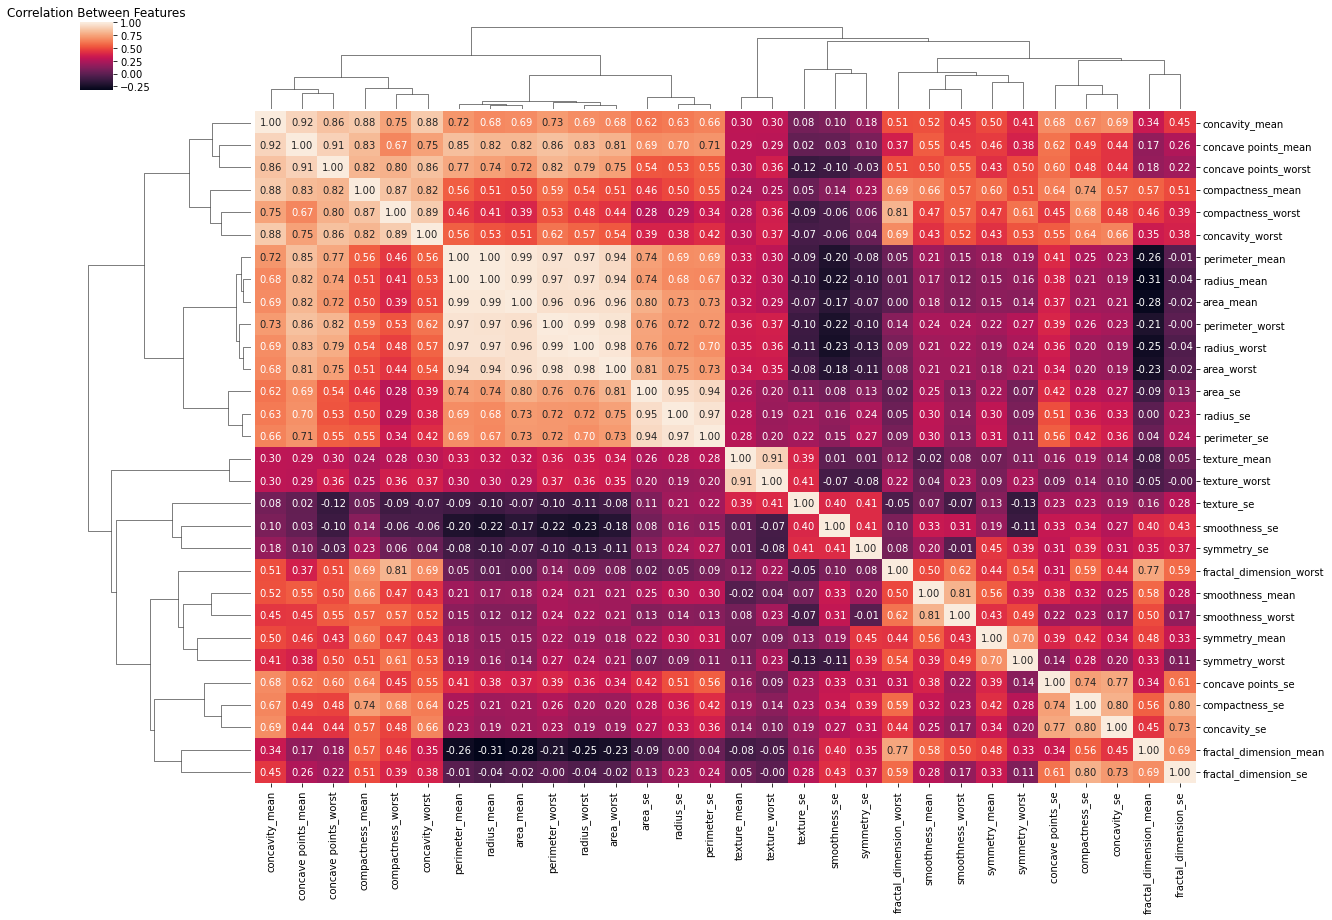

In [5]:
# correlation:
corr_matrix = data.corr()
sns.clustermap(corr_matrix,annot=True,fmt=".2f",figsize=(20,14))
plt.title("Correlation Between Features")

<a id = "6"></a><br>
## Missing Values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

<a id = "11"></a><br>
## Outlier Detection

### Outlier detection with Local Outlier Factor (LOF)

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors.

The number of neighbors considered (parameter n_neighbors) is typically set 1) greater than the minimum number of samples a cluster has to contain, so that other samples can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by samples that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

In [7]:
# Change object to integer:
data["diagnosis"] = [1 if item == "M" else 0  for item in data["diagnosis"]]

In [8]:
y = data["diagnosis"]
x = data.drop(["diagnosis"],axis=1)

In [9]:
columns = x.columns.tolist()

In [10]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x)

* property fit_predict :
* is_inlierarray, shape (n_samples,)
* Returns -1 for anomalies/outliers and 1 for inliers.

In [11]:
y_pred[:10]

array([ 1,  1,  1, -1,  1, -1,  1,  1,  1, -1])

In [12]:
X_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

In [13]:
outlier_score.head()

,score
0,-1.422440
1,-1.066782
2,-0.978948
3,-1.596933
4,-1.069936


In [14]:
# So make threshold: we decide about max and min of "outlier_score"
threshold = -2
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()

In [15]:
# Radius for our outliers
radius = (X_score.max()-X_score)/(X_score.max()-X_score.min())

<a id = "13"></a><br>
## Drop Outliers

In [16]:
x = x.drop(outlier_index)
y = y.drop(outlier_index)

<a id = "14"></a><br>
## Create Train and Test Dataset

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

<a id = "15"></a><br>
## Standardization

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test  = sc.transform(x_test) 

<a id = "16"></a><br>
## KNN Model

* Sensitive for outliers
* Problems on working with big data
* Curse of Dimensionality
* Feature Scaling
* Problems on working with imbalanced data
* Depends on K, model will check K nearest neighbour.

In [19]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [20]:
knn_cm = confusion_matrix(y_test,y_pred)
knn_acc = metrics.accuracy_score(y_test, y_pred)
print(knn_cm)
print(knn_acc)

[[120   0]
 [  8  59]]
0.9572192513368984


<a id = "17"></a><br>
## KNN Tuning

In [21]:
# Tuning Model
n_neighbors = [5,7,9,11,13,15,17,19,21]
weights = ["uniform","distance"]
metric = ["euclidean","manhattan","minkowski"]
param_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

In [22]:
knn = KNeighborsClassifier()
gs = GridSearchCV(estimator=knn,param_grid=param_grid,scoring="accuracy", cv=10)
grid_search = gs.fit(x_train,y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

Best Score: 0.9414651493598862
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


<a id = "18"></a><br>
## Make Prediction After Tuning

In [23]:
knn = KNeighborsClassifier(metric='manhattan',n_neighbors=9,weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [24]:
knn_cm = confusion_matrix(y_test,y_pred)
knn_acc = metrics.accuracy_score(y_test, y_pred)
print(knn_cm)
print(knn_acc)

[[119   1]
 [  9  58]]
0.946524064171123


<a id = "19"></a><br>
## Principal Component Analysis (PCA)

In [25]:
data = pd.read_csv("C:/Users/Rajeev/Downloads/breast-cancer-wisconsin-data/data.csv")
# Drop Unnecessary columns
data.drop(["Unnamed: 32","id"],axis=1,inplace=True)
# Change object to integer:
data["diagnosis"] = [1 if item == "M" else 0  for item in data["diagnosis"]]
y = data["diagnosis"]
x = data.drop(["diagnosis"],axis=1)

In [26]:
# PCA needs scaled data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [27]:
# Build PCA
pca = PCA(n_components = 2)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)

In [28]:
pca_data = pd.DataFrame(X_reduced_pca,columns=["p1","p2"])
pca_data["diagnosis"] = y

<a id = "21"></a><br>
## Classification After PCA

In [29]:
pca_data.head()

,p1,p2,diagnosis
0,9.192837,1.948583,1
1,2.387802,-3.768172,1
2,5.733896,-1.075174,1
3,7.122953,10.275589,1
4,3.935302,-1.948072,1


### Prepare X and Y

In [30]:
y_pca = pca_data.diagnosis
x_pca = pca_data.drop(["diagnosis"],axis=1)

In [31]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y_pca, test_size=0.33, random_state=42)

### KNN Model via PCA Features

In [32]:
knn_pca = KNeighborsClassifier()
knn_pca.fit(x_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(x_test_pca)

In [33]:
knn_cm_pca = confusion_matrix(y_test_pca,y_pred_pca)
knn_acc_pca = metrics.accuracy_score(y_test_pca, y_pred_pca)
print(knn_cm_pca)
print(knn_acc_pca)

[[113   8]
 [  1  66]]
0.9521276595744681


## Let's see what points are in the correct area! 

(-8.775852804243655, 13.524147195756662)

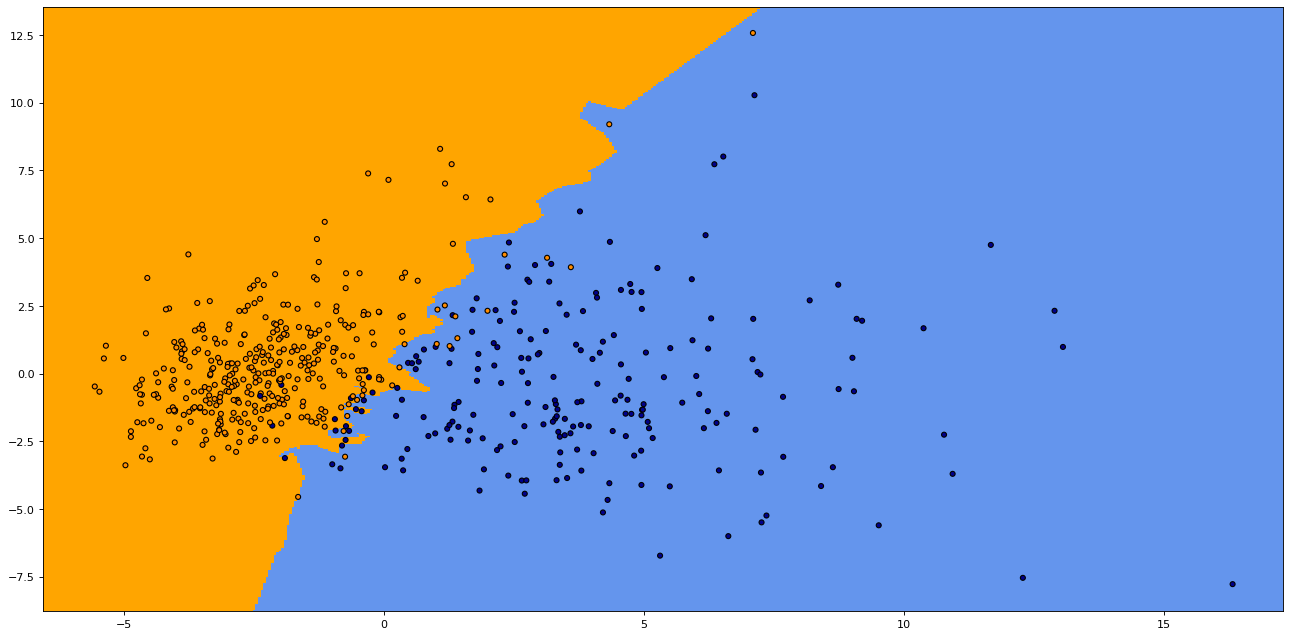

In [34]:
# visualize 
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .05 # step size in the mesh
X = x_pca
x_min, x_max = (X.iloc[:, 0].min() - 1), (X.iloc[:, 0].max() + 1)
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20, 10), dpi=80)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

<a id = "25"></a><br>
## Compare Accuracies

In [35]:
models = ["Default","PCA"]
values = [0.946,0.952]

Text(0, 0.5, 'Accuracies')

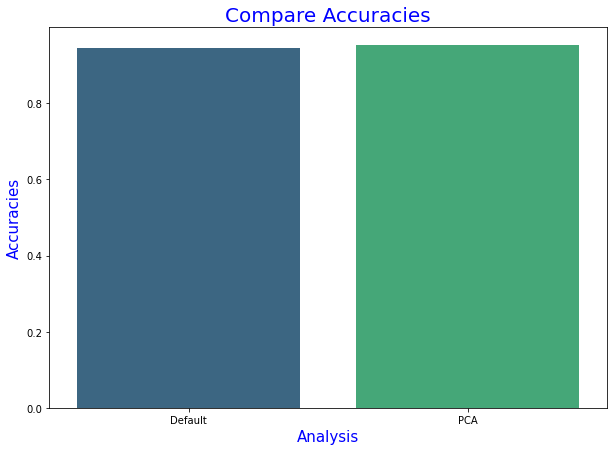

In [36]:
# Compare Model's Acc
f,ax = plt.subplots(figsize = (10,7))
sns.barplot(x=models, y=values,palette="viridis");
plt.title("Compare Accuracies",fontsize = 20,color='blue')
plt.xlabel('Analysis',fontsize = 15,color='blue')
plt.ylabel('Accuracies',fontsize = 15,color='blue')

## Cluster analysis of Dataset

In [37]:
X = StandardScaler().fit_transform(x)

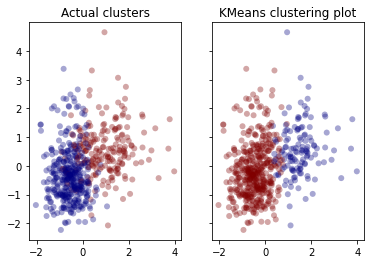

In [38]:
# KMeans Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score 

v_scores = []

km = KMeans(n_clusters=2, init="k-means++", n_init=10)
km_pred = km.fit_predict(x)
#labels = km.labels_

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=km_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("KMeans clustering plot")

v_scores.append(v_measure_score(y, km_pred)) 

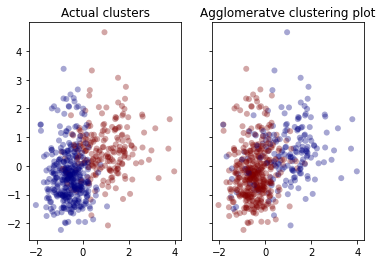

In [39]:
#2 Hierarchical Agglomerative Clustering 

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, linkage="ward")
ac_pred = ac.fit_predict(X)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=ac_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("Agglomeratve clustering plot")

v_scores.append(v_measure_score(y, ac_pred)) 

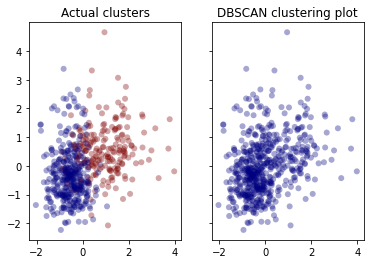

In [40]:
#3 DBSCAN (Density-Based Clustering of Applications with Noise)

from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.3, min_samples=6)
dbs_pred = dbs.fit_predict(X)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=dbs_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("DBSCAN clustering plot")

v_scores.append(v_measure_score(y, dbs_pred)) 

In [41]:
print("V-measure of the clustering models -> [KMeans, AggCluster, DBScan]: ", v_scores)
v_scores

V-measure of the clustering models -> [KMeans, AggCluster, DBScan]:  [0.46479332792160793, 0.4569149200498728, 0.0]


[0.46479332792160793, 0.4569149200498728, 0.0]